# Testing population ageing as explanatory variable

### Setup

In [14]:
import pandas as pd
import numpy as np
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.express as px
import pycountry_convert as pc
import matplotlib.pyplot as plt

In [20]:
#Jupyter setup (to display in notebook)
init_notebook_mode(connected=True)

In [21]:
chart_studio.tools.set_credentials_file(username='sagaciousplots', api_key='97jNm6mo2vxdYga1mtYv')

data from: https://data.oecd.org/pop/elderly-population.htm

In [59]:
#read in demographic data
demographic = pd.read_csv('./demographic_data.csv')

Data from: https://github.com/CSSEGISandData/COVID-19

In [60]:
#import data
deaths = pd.read_csv('./COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
infected = pd.read_csv('./COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_US = pd.read_csv('./COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
infected_US = pd.read_csv('./COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
#add a column called United States to the US datasets so that they are compatible
deaths_US['Country/Region'] = 'United States'
infected_US['Country/Region'] = 'United States'

## Data wrangling Covid Data

In [61]:
#statistics for countries (group all regions together)
deaths = deaths.groupby('Country/Region').sum() 
infected = infected.groupby('Country/Region').sum() 
#sum over all states in the US
deaths_US = deaths_US.groupby('Country/Region').sum()
infected_US = infected_US.groupby('Country/Region').sum()

In [62]:
#take just the most recent day (i.e. data) for analysis
deaths = deaths[deaths.columns[-1]]
infected = infected[infected.columns[-1]]
deaths_US = deaths_US[deaths_US.columns[-1]]
infected_US = infected_US[infected_US.columns[-1]]
deaths = deaths.append(deaths_US)
infected = infected.append(infected_US)

In [63]:
#create a pd.series with contains deathrates for all countries within the datasets
deathrate = deaths/infected
countries_deathrate = deathrate.index

## Data wrangling Ageing Data
Describes how many people in % of a population are older than 65

In [64]:
#making a list of country names and years maybe for later purpose
country_names_age = np.ndarray.tolist(demographic['LOCATION'].unique())
years_age = np.ndarray.tolist(demographic['TIME'].unique())

#change the index from meaningless numbers to year of enquiry
demographic.set_index('TIME', inplace=True)
demographic.drop(['INDICATOR', 'MEASURE', 'FREQUENCY'], axis=1, inplace=True)

#sort data with years for EDA
demographic.sort_values(['TIME'], ascending = [0], inplace=True)

#have a look at the data
demographic

,LOCATION,SUBJECT,Value,Flag Codes
TIME,,,,
2018,G20,TOT,11.037,NaN
2018,AUS,TOT,15.663,NaN
2018,ITA,TOT,22.675,NaN
2018,EU28,TOT,19.849,NaN
2018,CZE,TOT,19.414,NaN
...,...,...,...,...
1960,EST,TOT,10.546,NaN
1960,COL,TOT,3.172,NaN
1960,CHL,TOT,4.767,NaN


In [65]:
#around(since incl. G20, EU28) 56 countries are part of the data set 
len(country_names_age)

56

In [66]:
#making a dictionary with countries as keys and the dataframe of each country as values
df_collection_age = dict(tuple(demographic.groupby('LOCATION')))

In [67]:
#since each df in the dictionary is ordered from years,
#we can take head to have the most recent years
for country in country_names_age:
    df_collection_age[country] = df_collection_age[country].head(1)

In [68]:
#making a df which contains only the most recent year for each country
df_recentyear_age = pd.DataFrame()
for country in country_names_age:
    df_recentyear_age = df_recentyear_age.append(df_collection_age[country])

In [69]:
df_recentyear_age

,LOCATION,SUBJECT,Value,Flag Codes
TIME,,,,
2018,AUS,TOT,15.663,NaN
2018,AUT,TOT,18.759,NaN
2018,BEL,TOT,18.835,NaN
2018,CAN,TOT,17.157,NaN
2018,CZE,TOT,19.414,NaN
2018,DNK,TOT,19.461,NaN
2018,FIN,TOT,21.613,NaN
2018,FRA,TOT,19.837,NaN
2018,DEU,TOT,21.466,NaN


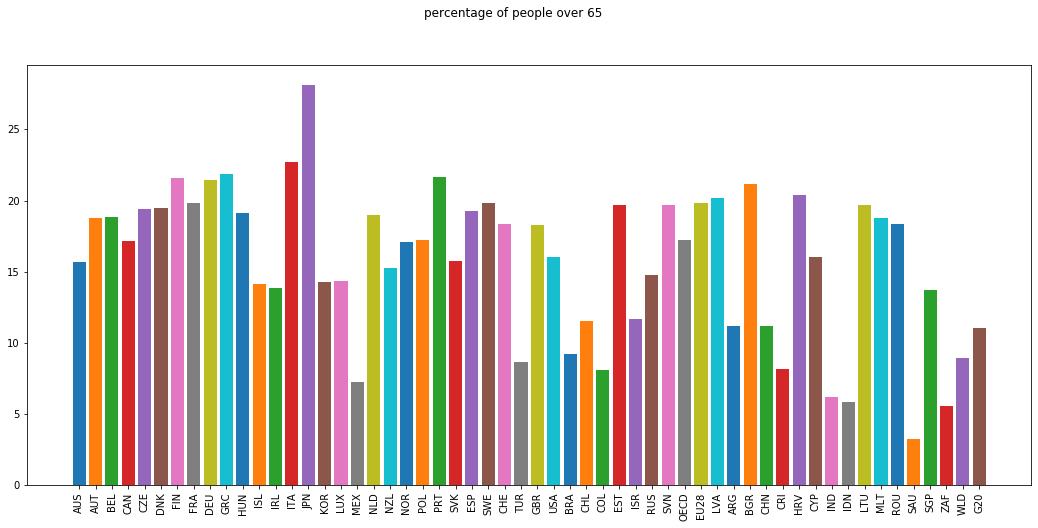

In [70]:
#making a barplot to have an overview over the final age data
plt.figure(figsize=(18,8))
for index, row in df_recentyear_age.iterrows():
    plt.bar(row['LOCATION'], row['Value'])
plt.xticks(country_names_age, rotation='vertical')
plt.subplots_adjust(bottom=0.15)
plt.suptitle('percentage of people over 65')
plt.show()

In [38]:
#delete g20 eu28, wld, oecd since they are not part of the deathrate dataset
df_recentyear_age = df_recentyear_age[~df_recentyear_age.LOCATION.str.contains('G20|EU28|WLD|OECD')]
df_recentyear_age

,LOCATION,SUBJECT,Value,Flag Codes
TIME,,,,
2018,AUS,TOT,15.663,NaN
2018,AUT,TOT,18.759,NaN
2018,BEL,TOT,18.835,NaN
2018,CAN,TOT,17.157,NaN
2018,CZE,TOT,19.414,NaN
2018,DNK,TOT,19.461,NaN
2018,FIN,TOT,21.613,NaN
2018,FRA,TOT,19.837,NaN
2018,DEU,TOT,21.466,NaN


In [71]:
#create manually a list of the names of the list before since in the hospitalbed data set only
#3 letter codes were used and in the other data set we use full name
country_longnames_recent_age = ['Australia','Austria', 'Belgium', 'Canada', 'Czechia',
                       'Denmark', 'Finland', 'France', 'Germany', 'Greece','Hungary',
                       'Iceland', 'Ireland', 'Italy', 'Japan',
                       'Korea, South', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
                       'Norway', 'Poland', 'Portugal', 'Slovakia', 'Spain',
                       'Sweden', 'Switzerland', 'Turkey','United Kingdom', 'United States',
                       'Brazil', 'Chile', 'Colombia','Estonia', 'Israel', 'Russia','Slovenia',
                        'Latvia', 'Argentina', 'Bulgaria', 'China', 'Costa Rica', 'Croatia', 'Cyprus',
                        'India', 'Indonesia','Lithuania', 'Malta', 'Romania', 'Saudi Arabia',
                           'Singapore', 'South Africa']

In [42]:
#make use of the list (full name) to extract the rows (deathrate data) 
#of countries that have data regarding hospitalbed density 
deathrate = deathrate.get(country_longnames_recent_age)

In [43]:
deathrate

Country/Region
Australia         0.013917
Austria           0.039038
Belgium           0.162903
Canada            0.071775
Czechia           0.034491
Denmark           0.049762
Finland           0.045287
France            0.150079
Germany           0.044392
Greece            0.055393
Hungary           0.128197
Iceland           0.005552
Ireland           0.063410
Italy             0.139841
Japan             0.039944
Korea, South      0.023592
Luxembourg        0.025977
Mexico            0.098357
Netherlands       0.127364
New Zealand       0.014028
Norway            0.027545
Poland            0.049675
Portugal          0.041331
Slovakia          0.017845
Spain             0.117589
Sweden            0.122085
Switzerland       0.060803
Turkey            0.027481
United Kingdom    0.143274
United States     0.059858
Brazil            0.068711
Chile             0.010744
Colombia          0.041247
Estonia           0.035037
Israel            0.015631
Russia            0.009076
Slovenia     

## Plotting and analyzing data

In [72]:
fig = px.histogram(x=deathrate)
fig.show()

In [46]:
fig = px.histogram(df_recentyear_age, x="Value")
fig.show()

In [49]:
#append deathrate to our df from part 1 (containing information about the hospitalbeds
#using list, so that's iterable
df_recentyear_age['death rate'] = list(deathrate)
#plus making sure that the correct countries are appended on the correct row
#and it's more convenient to read than the country 3 letter code
df_recentyear_age['Country'] = country_longnames_recent_age



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
df_recentyear_age

,LOCATION,SUBJECT,Value,Flag Codes,Deathrate,Country,log10Deathrate
TIME,,,,,,,
2018,AUS,TOT,15.663,NaN,0.013917,Australia,-1.856461
2018,AUT,TOT,18.759,NaN,0.039038,Austria,-1.408514
2018,BEL,TOT,18.835,NaN,0.162903,Belgium,-0.788071
2018,CAN,TOT,17.157,NaN,0.071775,Canada,-1.144025
2018,CZE,TOT,19.414,NaN,0.034491,Czechia,-1.462292
2018,DNK,TOT,19.461,NaN,0.049762,Denmark,-1.303103
2018,FIN,TOT,21.613,NaN,0.045287,Finland,-1.344022
2018,FRA,TOT,19.837,NaN,0.150079,France,-0.823681
2018,DEU,TOT,21.466,NaN,0.044392,Germany,-1.352695


In [52]:
countries = np.asarray(list(df_recentyear_age['Country']))
# Continent_code to Continent_names as a dictionary
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defining Function for getting continent code for country by using the pc library
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'

#Collecting continent Information, insert at position 1, with column name 'continent'
df_recentyear_age.insert(1,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])

In [53]:
df_recentyear_age

,LOCATION,continent,SUBJECT,Value,Flag Codes,Deathrate,Country,log10Deathrate
TIME,,,,,,,,
2018,AUS,Australia,TOT,15.663,NaN,0.013917,Australia,-1.856461
2018,AUT,Europe,TOT,18.759,NaN,0.039038,Austria,-1.408514
2018,BEL,Europe,TOT,18.835,NaN,0.162903,Belgium,-0.788071
2018,CAN,North America,TOT,17.157,NaN,0.071775,Canada,-1.144025
2018,CZE,Europe,TOT,19.414,NaN,0.034491,Czechia,-1.462292
2018,DNK,Europe,TOT,19.461,NaN,0.049762,Denmark,-1.303103
2018,FIN,Europe,TOT,21.613,NaN,0.045287,Finland,-1.344022
2018,FRA,Europe,TOT,19.837,NaN,0.150079,France,-0.823681
2018,DEU,Europe,TOT,21.466,NaN,0.044392,Germany,-1.352695


In [54]:
df_recentyear_age.loc[df_recentyear_age['continent']=='Others']

,LOCATION,continent,SUBJECT,Value,Flag Codes,Deathrate,Country,log10Deathrate
TIME,,,,,,,,
2018,KOR,Others,TOT,14.294,NaN,0.023592,"Korea, South",-1.627239


In [55]:
df_recentyear_age.loc[df_recentyear_age['Country']=='Korea, South', 'continent'] = 'Asia'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df_recentyear_age=df_recentyear_age.rename(columns = {'Value':'% of People older than 65'})

In [58]:
fig = px.scatter(df_recentyear_age,
    x = '% of People older than 65',
    y = 'death rate',
    hover_name=countries,
    color='continent',
    title='Population Ageing vs death rate')
fig.show()
#add to plotly account
#py.iplot(fig, filename='Respiratory_diseases_Linear_Regression', auto_open=True) 